In [1]:
import os
import random
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Disable symlink warnings
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

c:\python312\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
train_emoticon_df = pd.read_csv("datasets/train/train_emoticon.csv")
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
train_emoticon_Y = train_emoticon_df['label'].tolist()

valid_emoticon_df = pd.read_csv("datasets/valid/valid_emoticon.csv")
valid_emoticon_X = valid_emoticon_df['input_emoticon'].tolist()
valid_emoticon_Y = valid_emoticon_df['label'].tolist()

In [3]:
model = SentenceTransformer('all-MiniLM-L6-v2')

x_train_embeddings = model.encode(train_emoticon_X)
x_val_embeddings = model.encode(valid_emoticon_X)

In [4]:
scaler = StandardScaler()
x_train_embeddings = scaler.fit_transform(x_train_embeddings)
x_val_embeddings = scaler.transform(x_val_embeddings)

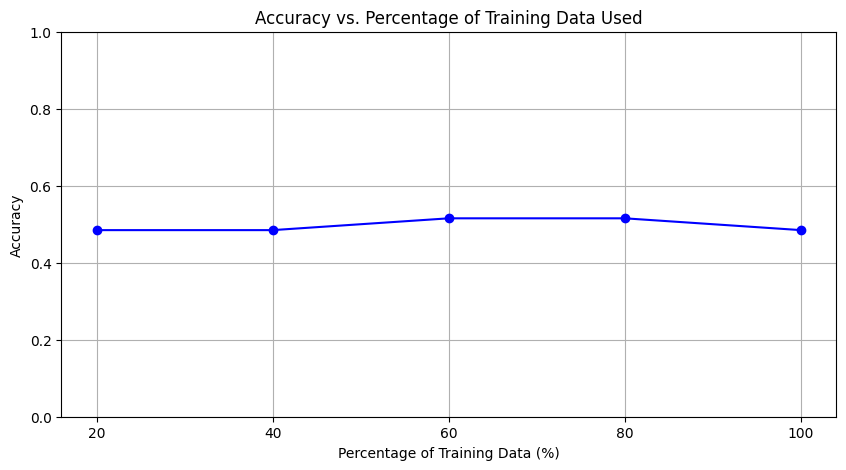

In [5]:
percentages = [20, 40, 60, 80, 100]
accuracies = []

for percent in percentages:
    n_samples = int(len(x_train_embeddings) * percent / 100)

    x_train_subset = x_train_embeddings[:n_samples]
    y_train_subset = train_emoticon_Y[:n_samples]

    lr_model = LogisticRegression(max_iter=1000, solver='saga')

    lr_model.fit(x_train_subset, y_train_subset)

    predicted_labels = lr_model.predict(x_val_embeddings)

    accuracy = accuracy_score(valid_emoticon_Y, predicted_labels)
    accuracies.append(accuracy)


plt.figure(figsize=(10, 5))
plt.plot(percentages, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Percentage of Training Data Used')
plt.xlabel('Percentage of Training Data (%)')
plt.ylabel('Accuracy')
plt.xticks(percentages)
plt.ylim(0, 1) 
plt.grid()
plt.show()